## Making figure A1

start by importing modules, data and priors

In [9]:
import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist
import h5py

from makeCorner import *

In [10]:
data_peak_analysis = h5py.File("../data/peak_analysis.hdf")

In [11]:
left = 15-60
right = 60
middle = right - (right - left) /2

new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "mu_m1":dist.Uniform(15,60),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-6,0),
    "log_high_f_peak": dist.Uniform(-6,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,0.8),
    "high_mu": dist.Uniform(15, 60),
    "width_mu": dist.Uniform(-1,1),
    "middle_z_mu": dist.Uniform(0,0.8),
    "sig_m1": dist.Uniform(1.5,15),
    "high_sig": dist.Uniform(1.5,15),
    "width_sig": dist.Uniform(-1,1),
    "middle_z_sig": dist.Uniform(0,0.8),
    "delta_mu": [left, right, middle],
}

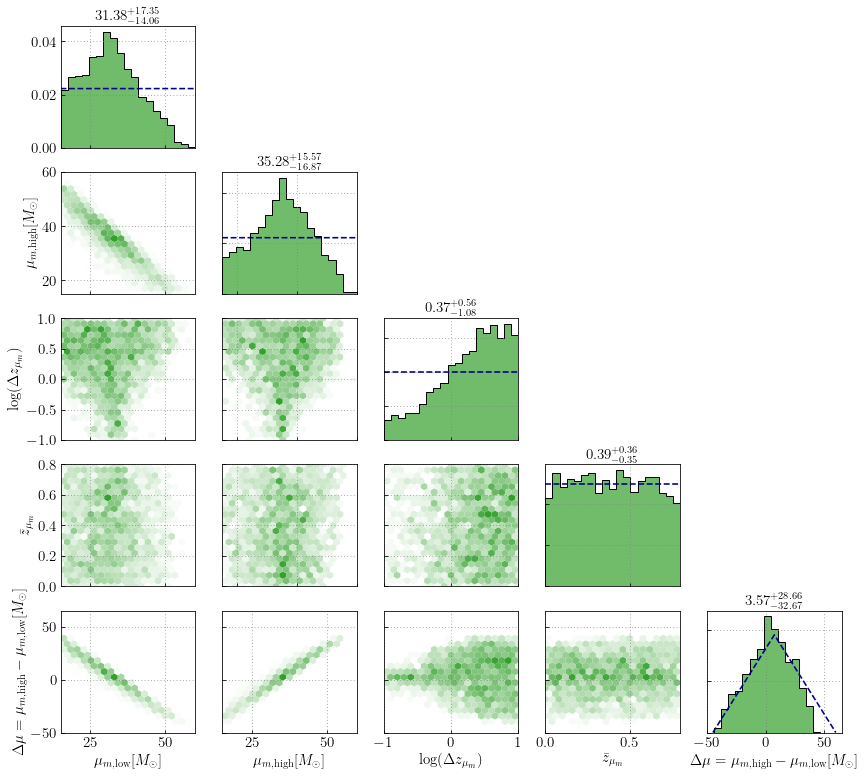

In [13]:
delta_mu = data_peak_analysis['posterior/high_mu'][:] - data_peak_analysis['posterior/mu_m1'][:]

fig = plt.figure(figsize=(14,13))
toPlot_no_GWB_mu = {
    "mu_m1":{"data":data_peak_analysis['posterior/mu_m1'],"plot_bounds":(15, 60),"label":r"$\mu_{m, \rm low} [M_\odot]$"},
    "high_mu":{"data":data_peak_analysis['posterior/high_mu'],"plot_bounds":(15, 60),"label":r"$\mu_{m, \rm high} [M_\odot]$"},
    "width_mu":{"data":np.log10(data_peak_analysis['posterior/width_mu']),"plot_bounds":(-1,1),"label":r"log($\Delta z_{\mu_{m}}$)"},
    "middle_z_mu":{"data":data_peak_analysis['posterior/middle_z_mu'],"plot_bounds":(0,0.8),"label":r"$\bar z_{\mu_{m}}$"},
    "delta_mu":{"data":delta_mu, "plot_bounds":(-50, 65), "label":r"$\Delta \mu = \mu_{m, \rm high} - \mu_{m, \rm low} [M_\odot]$"},
}
plot_corner(fig, toPlot_no_GWB_mu, "#33a02c", labelsize=15, priors = new_priors)
plt.savefig("figure_A1.pdf", dpi=600, bbox_inches='tight')
plt.show()